In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, ccf, grangercausalitytests
from statsmodels.tsa.api import VAR


locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
df = pd.read_csv('../data/df_analise.csv').set_index('Data')
df.index = pd.to_datetime(df.index, format='%b/%Y')
df = df.asfreq(pd.infer_freq(df.index))

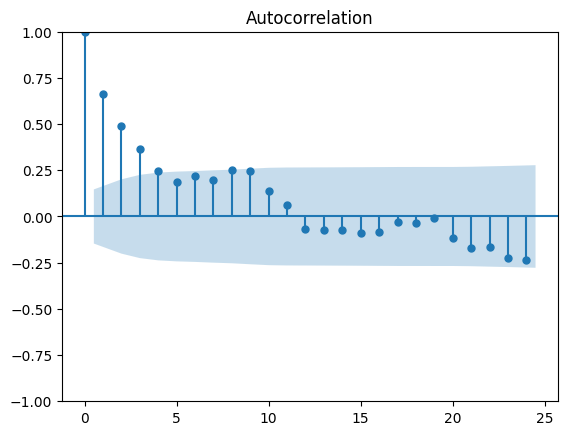

In [2]:
plot_acf(x=df['IGPM'], lags=24)
plt.show()

In [3]:
result_adfuller = adfuller(df['IGPM'], autolag='AIC')
print('Stationary: ' + str(result_adfuller[1] < 0.05))

Stationary: True


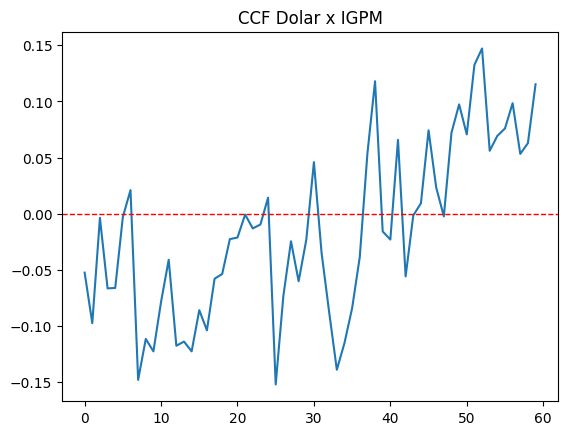

In [4]:
result_ccf = ccf(df['Dolar'], df['IGPM'], adjusted=True)[:60]
plt.plot(result_ccf, label='ccf')
plt.title('CCF Dolar x IGPM')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

In [5]:
model = VAR(df[['Dolar', 'IGPM']])
lag_order = model.select_order(maxlags=24)
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,2.913,2.952,18.41,2.929
1,2.334*,2.452*,10.32*,2.382*
2,2.355,2.551,10.53,2.434
3,2.399,2.674,11.01,2.511
4,2.402,2.756,11.05,2.546
5,2.439,2.871,11.47,2.615
6,2.437,2.947,11.44,2.644
7,2.416,3.006,11.22,2.656
8,2.397,3.065,11.01,2.668
9,2.448,3.194,11.60,2.751


In [6]:
result_var = model.fit(maxlags=3)
print(result_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           ter, 29, abr, 2025
Time:                     15:23:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.57998
Nobs:                     176.000    HQIC:                   2.43007
Log likelihood:          -690.311    FPE:                    10.2560
AIC:                      2.32778    Det(Omega_mle):         9.48642
--------------------------------------------------------------------
Results for equation Dolar
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            1.099843         0.447212            2.459           0.014
L1.Dolar        -0.032685         0.076628           -0.427           0.670
L1.IGPM         -0.805390         0.514037           -1.567           0.117
L2.D

In [12]:
cause = result_var.test_causality('IGPM', 'Dolar', kind='f')
cause.summary()

Test statistic,Critical value,p-value,df
1.678,2.631,0.171,"(3, 338)"


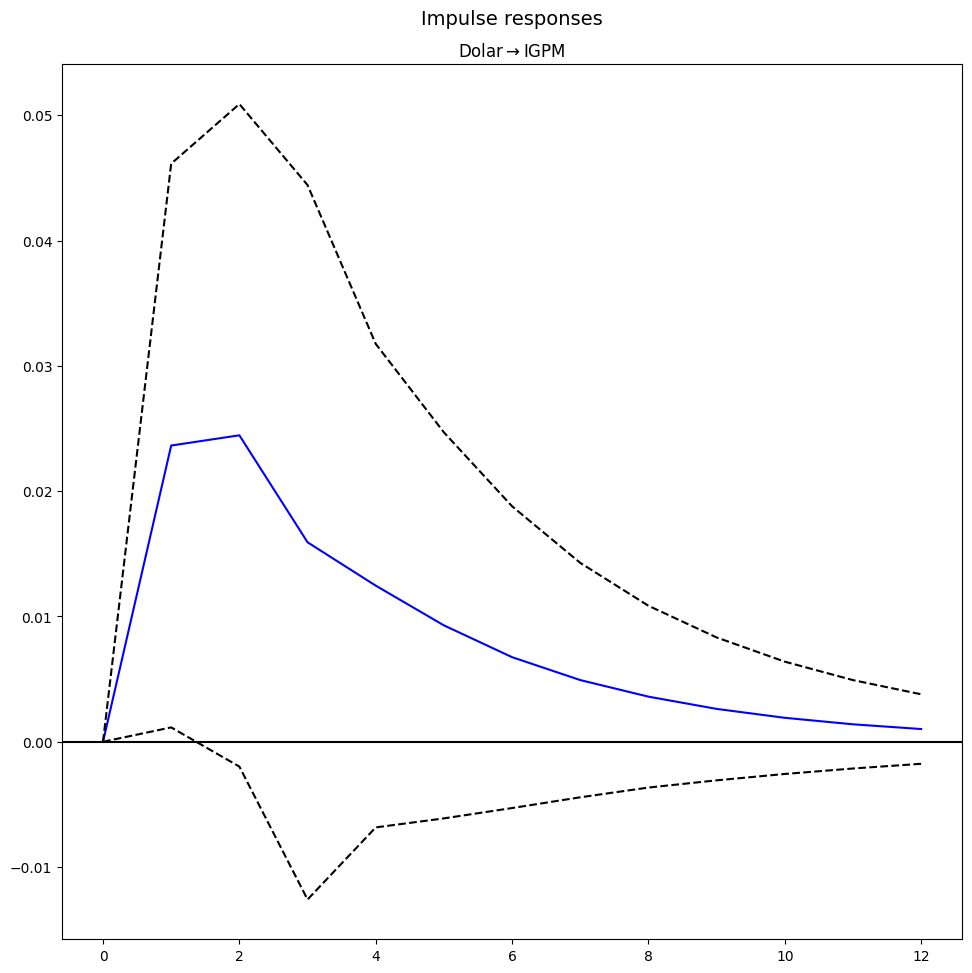

In [8]:
irf = result_var.irf(12)
irf.plot(impulse='Dolar', response='IGPM')
plt.show()

In [9]:
dolar_index = 0
x_index = 1

# Respostas de x a choques no Dólar
response_x_to_dolar = irf.orth_irfs [:, dolar_index, x_index]

for month, value in enumerate(response_x_to_dolar):
    print(f"Mês {month}: {value:.5f}")

Mês 0: 0.00000
Mês 1: -0.54695
Mês 2: 0.26147
Mês 3: -0.24597
Mês 4: -0.11357
Mês 5: -0.08651
Mês 6: -0.06539
Mês 7: -0.05000
Mês 8: -0.03537
Mês 9: -0.02608
Mês 10: -0.01902
Mês 11: -0.01386
Mês 12: -0.01010


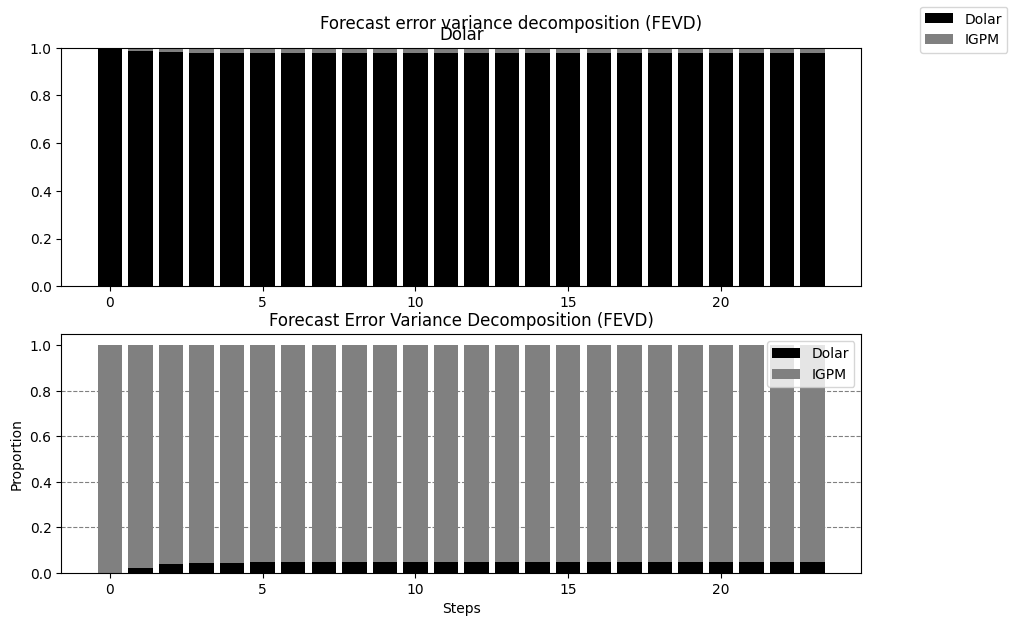

In [11]:
fevd = result_var.fevd(24)

# Plot the FEVD
fevd.plot(figsize=(10, 6))
plt.title("Forecast Error Variance Decomposition (FEVD)")
plt.xlabel("Steps")
plt.ylabel("Proportion")
plt.legend(loc='best')

for level in [0.2, 0.4, 0.6, 0.8]:
    plt.axhline(level, color='gray', linestyle='--', linewidth=0.8)

plt.show()